--> This is the clean and final version of the inverse differencing task. Here, we know all the characteristics and parameters of the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data  = pd.read_csv('Electric_Production.csv')

In [4]:
data = data.rename(columns={'IPG2211A2N': 'Production'})

data['DATE'] = pd.to_datetime(data['DATE'])

data.head()

,DATE,Production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [6]:
differenced_data = data['Production'].diff().dropna()

In [7]:
differenced_data

1      -1.8332
2      -8.2218
3      -4.9788
4      -2.1563
5       2.7753
        ...   
392   -10.3158
393    -5.0017
394     3.7222
395    17.3853
396    14.6836
Name: Production, Length: 396, dtype: float64

In [8]:
model = SARIMAX(differenced_data.values, order=(1,0,1), seasonal_order=(2,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

In [9]:
forecast = model_fit.forecast(steps = 12)

In [10]:
forecast

array([-14.39676504,  -8.61218709, -14.08914069,   1.59603389,
        10.08767684,   8.93625479,  -1.75405725,  -9.70752358,
        -7.66241199,   3.88268282,  13.2385057 ,  12.28293347])

In [11]:
forecast_index = range(397, 397 + len(forecast))

# Convert forecast_2 to a pandas Series with the new index
forecast_series = pd.Series(forecast, index=forecast_index)

In [22]:
last_value = data['Production'].iloc[-1]

last_value

129.4048

In [23]:
last_value = data['Production'].iloc[-1]  # The last known value in the original data
forecast_values = []

# Apply inverse differencing
for i in range(len(forecast_series)):
    # The original forecasted value is the sum of the last known value and the differenced forecast
    forecast_value = last_value + forecast_series.iloc[i]
    forecast_values.append(forecast_value)
    # Update the last known value for the next iteration
    last_value = forecast_value

# Convert the forecasted values to a pandas Series for better visualization
forecast_final = pd.Series(forecast_values, index=range(397, 409), name="Forecasted Production")

# If you want to add this forecast back to your original dataframe, you can do so
forecast_final

397    115.008035
398    106.395848
399     92.306707
400     93.902741
401    103.990418
402    112.926673
403    111.172615
404    101.465092
405     93.802680
406     97.685363
407    110.923868
408    123.206802
Name: Forecasted Production, dtype: float64

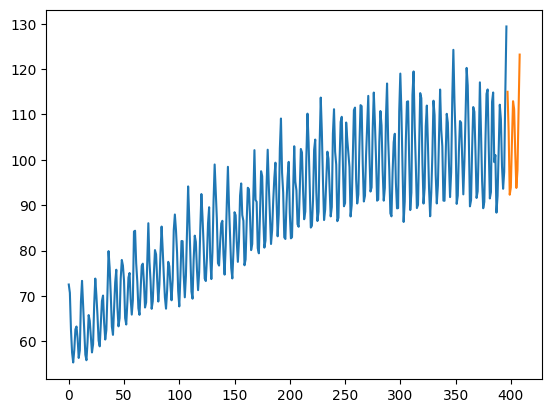

In [24]:
plt.plot(data['Production'])
plt.plot(forecast_final)

In [29]:
import pandas as pd

# Extract the last date from your original 'data' DataFrame
last_date = pd.to_datetime(data['DATE'].iloc[-1])

# Create a new date range starting from the next month
forecast_dates = pd.date_range(start=last_date, periods=len(forecast_final) + 1, freq='MS')[1:]

# Create a DataFrame by combining the forecast dates with the forecasted values
forecast_df = pd.DataFrame({
    'DATE': forecast_dates,
    'Production': forecast_final.values
})

# Show the final DataFrame
forecast_df


,DATE,Production
0,2018-02-01,115.008035
1,2018-03-01,106.395848
2,2018-04-01,92.306707
3,2018-05-01,93.902741
4,2018-06-01,103.990418
5,2018-07-01,112.926673
6,2018-08-01,111.172615
7,2018-09-01,101.465092
8,2018-10-01,93.802680
9,2018-11-01,97.685363


In [30]:
data

,DATE,Production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [31]:
forecast_df

,DATE,Production
0,2018-02-01,115.008035
1,2018-03-01,106.395848
2,2018-04-01,92.306707
3,2018-05-01,93.902741
4,2018-06-01,103.990418
5,2018-07-01,112.926673
6,2018-08-01,111.172615
7,2018-09-01,101.465092
8,2018-10-01,93.802680
9,2018-11-01,97.685363


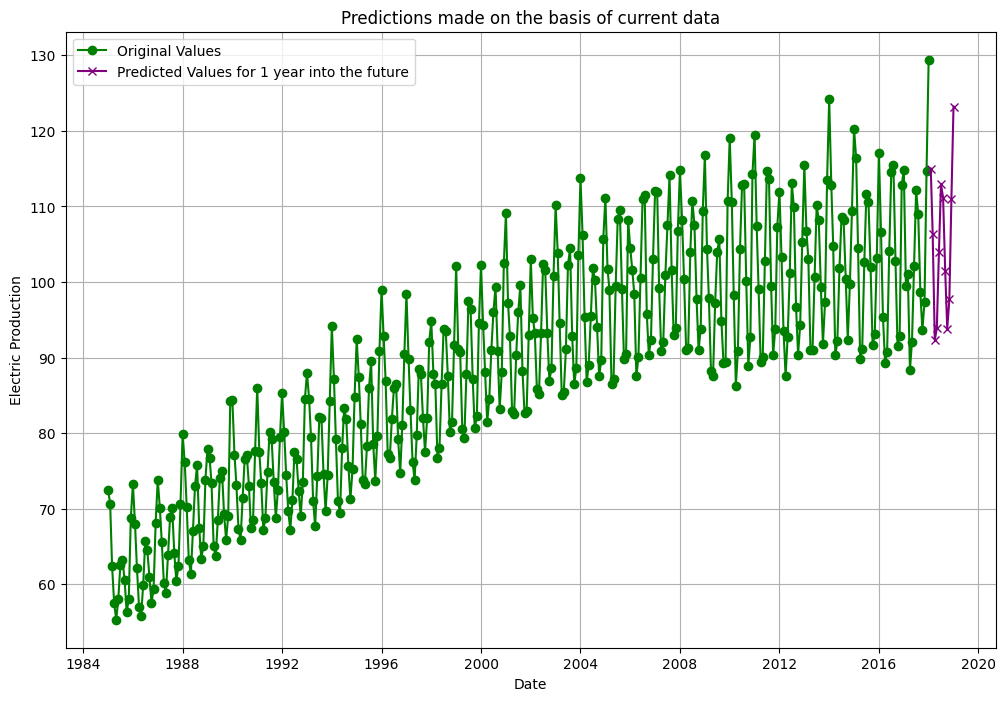

In [33]:
plt.figure(figsize=(12,8))
plt.plot(data['DATE'], data['Production'], color='green', marker='o', label='Original Values')
plt.plot(forecast_df['DATE'], forecast_df['Production'], color='purple', marker='x', label='Predicted Values for 1 year into the future')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Predictions made on the basis of current data')
plt.grid()
plt.show()